In [6]:
#импортируем необходимые компоненты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sil_sc

In [ ]:
data = pd.read_csv("data.csv").iloc[:,1:] 
#выбираем все строки, все столбцы, начиная с первого, т.к. столбец "id" нам не нужен

In [ ]:
#Находим оптимальное количество кластеров с помощью "Elbow method" и с помощью "average silhouette method"
distortions=[]
av_sil=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)#находим координаты центроидов для данного количесвта кластеров
    print("we have just fitted it for i=",i)
    distortions.append(kmeans.inertia_)
    av_sil.append(sil_sc(data,kmeans.predict(data),metric="euclidean"))
    print("we have just added sil_sc for i=",i)
    #добавляем сумму сум квадратов расстояний от объекта до ближайшего к нему центроида 
    #в качестве значения SSW для данного кол-ва кластеров

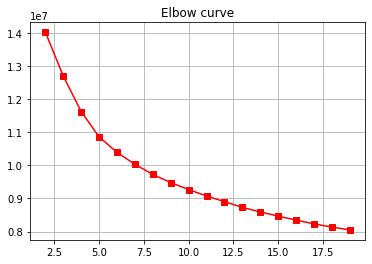

In [2]:
plt.title("Elbow curve")
plt.plot(range(2,20),distortions,color="red",marker="s")
plt.grid("True")
plt.show()
# По графику видно, что SSW начинает падать медленнее , начиная с 5 кластеров. Пока примем это за оптимальный вариант

In [ ]:
plt.title("Average silhouette curve")
plt.plot(range(2,10),av_sil,color="blue",marker="s")
plt.grid("True")
plt.show()
#По графику видно, что максимальный средний силуэт достигается при K=2 кластерах

In [ ]:
# Пробуем найти такую инициализацию центроидов, при которой в итоге получилось бы минимальная inertia(SSW)
best = KMeans(n_clusters=5,init='random').fit(data)
for i in range(1,100):
    kmeans_5=KMeans(n_clusters=3,init='random').fit(data)
    print("we just computed {0}th fitted estimator".format(i))
    if kmeans_5.inertia_<best.inertia_:
        best=kmeans_5
sub=best.predict(data)

In [3]:
sub=KMeans(n_clusters=5).fit_predict(data)

In [4]:
submition=pd.DataFrame({"Id":pd.read_csv("data.csv")["id"].values,"Predicted":sub})

In [5]:
submition.to_csv("submition.csv",index=False)